<a href="https://colab.research.google.com/github/Matteo2979/Volcano-Analysis/blob/main/Final_Volcano_EDA_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Libraries

!pip install geopandas

In [2]:
!pip install Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [1]:
!pip install basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 11.0 MB/s eta 0:00:00


In [1]:
# Import libraries

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from numpy.ma.core import size
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontEntry
from matplotlib.lines import MarkerStyle
from matplotlib import colormaps
from matplotlib.colors import Colormap
from google.colab import data_table

In [2]:
# Upload datasets to Pandas

kestrel = pd.read_csv("GVP_Volcano_List.csv")
eruption_data = pd.read_csv("eruptions_smithsonian.csv")
volcano_sparrow = pd.read_csv("NCEI_volcano_events.csv")

In [3]:
# Complete final dataset
df_complete = pd.read_csv("kestrel_hawkeye.csv")

In [6]:
# Main Volcano Dataset
   # Interactive display for Pandas dataframe which gives the ability to filter and sort dataset

data_table.DataTable(kestrel, num_rows_per_page=6)

In [4]:
# Dataset for all individual Eruptions on each volcano

data_table.DataTable(eruption_data)

In [20]:
# Volcano casualties dataset with Total Deaths

data_table.DataTable(volcano_sparrow)

In [61]:
# Dropping unneeded columns

kestrel.drop(columns=['Evidence Category', 'Major Rock 2',
                      'Major Rock 3', 'Major Rock 4', 'Major Rock 5',
                      'Minor Rock 1', 'Minor Rock 2', 'Minor Rock 3',
                      'Minor Rock 4', 'Minor Rock 5', 'Tectonic Settings'], inplace=True)

In [62]:
#Check for missing data

for col in kestrel.columns:
  pct_null = np.mean(kestrel[col].isnull())
  print('{}: {}'.format(col, pct_null))

Volcano Number: 0.0
Volcano Name: 0.0
Primary Volcano Type: 0.0
Last Eruption Year: 0.0
Country: 0.0
Latitude: 0.0
Longitude: 0.0
Elevation: 0.0
Population within 5 km: 0.0
Population within 10 km: 0.0
Population within 30 km: 0.0
Population within 100 km: 0.0
Region: 0.0
Subregion: 0.0
Major Rock 1: 0.0


In [63]:
# Checking datatypes

kestrel.dtypes

Volcano Number                int64
Volcano Name                 object
Primary Volcano Type         object
Last Eruption Year           object
Country                      object
Latitude                    float64
Longitude                   float64
Elevation                     int64
Population within 5 km        int64
Population within 10 km       int64
Population within 30 km       int64
Population within 100 km      int64
Region                       object
Subregion                    object
Major Rock 1                 object
dtype: object

In [ ]:
# Combining datasets and creating new features

  # Group by Volcano Name and find Average VEI
average_vei = eruption_data.groupby("Volcano Name")["VEI"].mean().reset_index()
  # Merge
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
  # Rename
combined_data.rename(columns={"VEI": "Average VEI"}, inplace=True)

  # Total Deaths
total_deaths_per_volcano = volcano_sparrow.groupby("Volcano Name")["Total Deaths"].sum().reset_index()
combined_data = combined_data.merge(total_deaths_per_volcano, on="Volcano Name", how="left")
combined_data.rename(columns={"Total Deaths": "Total Deaths"}, inplace=True)

  # Largest VEI
max_vei = eruption_data.groupby("Volcano Name")["VEI"].max().reset_index()
combined_data = combined_data.merge(max_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # Eruption Count
eruption_counts = eruption_data.groupby("Volcano Name").size().reset_index(name="eruption_count")
combined_data = combined_data.merge(eruption_counts, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # First Eruption year
first_er = eruption_data.groupby("Volcano Name")["Start Year"].min().reset_index()
combined_data = combined_data.merge(first_er, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # Average Eruption length (in days)
average_vei = eruption_data.groupby("Volcano Name")["days"].mean().reset_index()
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
combined_data.rename(columns={"days": "AVG erup (days)"}, inplace=True)

In [ ]:
# Downloading and exporting complete dataset

df_complete = "kestrel_complete.csv"
combined_data.to_csv(df_complete, index=False)

In [34]:
df_complete

Volcano Number                   Volcano Name        Country  \
0             273083                       Pinatubo    Philippines   
1             273070                           Taal    Philippines   
2             343060                       Ilopango    El Salvador   
3             263140                     Galunggung      Indonesia   
4             263280                          Kelud      Indonesia   
...              ...                            ...            ...   
1280          210010      West Eifel Volcanic Field        Germany   
1281          390022                         Berlin     Antarctica   
1282          324010  Black Butte Crater Lava Field  United States   
1283          327812                       Red Hill  United States   
1284          283141                      Nantaisan          Japan   

      First Eruption Year  Last Eruption Year  Eruption Count  AVG VEI  \
0                 -7460.0              1993.0               9     4.00   
1                 -3580.0              2022.0              39     2.45   
2                   450.0              1880.0               2     4.50   
3                 -2250.0              1984.0               7     3.17   
4                  -230.0              2014.0              41     2.81   
...                   ...                 ...             ...      ...   
1280              -8740.0             -8300.0               2      NaN   
1281              -8350.0             -8350.0               1      NaN   
1282              -8400.0             -8400.0               1      NaN   
1283              -9850.0             -9450.0               3      NaN   
1284              -9540.0             -9540.0               1      NaN   

      MAX VEI  Total Deaths  AVG erup (days)  ...  Pop 30km  Pop 100 km  \
0         6.0         824.0            104.0  ...   1148684    21875048   
1         6.0        1741.0             39.0  ...   2380326    24814047   
2         6.0       30000.0             86.0  ...   2948989     6689160   
3         5.0        4079.0             92.0  ...   2382939    23897342   
4         5.0       15460.0             18.0  ...   2087876    24999627   
...       ...           ...              ...  ...       ...         ...   
1280      NaN           NaN              NaN  ...    232256     7945412   
1281      NaN           NaN              NaN  ...         0           0   
1282      NaN           NaN              NaN  ...      4440      171376   
1283      NaN           NaN              NaN  ...         0           0   
1284      NaN           NaN              NaN  ...    128931    11079746   

                                  Subregion  Primary Volcano Type  \
0                                     Luzon         Stratovolcano   
1                                     Luzon               Caldera   
2                  El Salvador and Honduras               Caldera   
3                                      Java         Stratovolcano   
4                                      Java         Stratovolcano   
...                                     ...                   ...   
1280                         Western Europe        Volcanic field   
1281  Antarctica and South Sandwich Islands             Shield(s)   
1282                            USA (Idaho)                Shield   
1283                       USA (New Mexico)        Volcanic field   
1284                                 Honshu         Stratovolcano   

      Elevation (m)                             Tectonic Settings  \
0              1486  Subduction zone / Continental crust (>25 km)   
1               311  Subduction zone / Continental crust (>25 km)   
2               450  Subduction zone / Continental crust (>25 km)   
3              2168  Subduction zone / Continental crust (>25 km)   
4              1730  Subduction zone / Continental crust (>25 km)   
...             ...                                           ...   
1280            600        Rift zone / Continental crust (>25 k

In [41]:
# Creating a Table to show Volcano data by Country

  # Aggregate data by Country
df_merged = df_complete.groupby('Country')['Volcano Name'].count().reset_index(name='Number of Volcanoes')

df_5km = df_complete.groupby('Country')['Population within 5 km'].sum().reset_index()
df_10km = df_complete.groupby('Country')['Pop 10km'].sum().reset_index()
df_deaths = df_complete.groupby('Country')['Total Deaths'].sum().reset_index()
df_erup = df_complete.groupby('Country')['Eruption Count'].sum().reset_index()

df_merged = df_merged.merge(df_erup, on='Country', how='left')

df_merged['Eruptions Per Volcano'] = df_merged['Number of Volcanoes'] / df_complete['Eruption Count']
df_merged['Eruptions Per Volcano'] = df_merged['Eruptions Per Volcano'].round(2)

df_merged = df_merged.merge(df_deaths, on='Country', how='left')
df_merged = df_merged.merge(df_5km, on='Country', how='left')
df_merged = df_merged.merge(df_10km, on='Country', how='left')

df_merged.sort_values(by=['Total Deaths'], ascending=False).head(20)

Country  Number of Volcanoes  Eruption Count  \
48                         Indonesia                  120            1510   
27                       El Salvador                   18             140   
37                            France                   16             304   
18                          Colombia                   13             135   
50                             Italy                   13             392   
51                             Japan                  107            1751   
43                         Guatemala                   20             162   
67                       Philippines                   37             245   
88                     United States                  161            1338   
65                  Papua New Guinea                   46             324   
26                           Ecuador                   34             376   
55                            Mexico                   35             251   
60                         Nicaragua                   17             240   
84                            Turkey                   10              47   
72  Saint Vincent and the Grenadines                    1              23   
8                           Cameroon                    3              22   
66                              Peru                   16              83   
68                          Portugal                   13              84   
75                   Solomon Islands                    7              71   
46                           Iceland                   35             539   

    Eruptions Per Volcano  Total Deaths  Population within 5 km  Pop 10km  
48                  15.00      143214.0                 3082468   8465591  
27                   0.31       30327.0                 3264274   5193457  
37                   1.23       29526.0                  388455    455735  
18                   3.25       25475.0                   25647    255143  
50                   0.30       23069.0                 3438856   4128253  
51                  15.29       22677.0                  668360   1538722  
43                   1.67       10425.0                 1088399   2071439  
67                   9.25        7930.0                 2860845   4128899  
88                   4.24        5566.0                  173505    235185  
65                   1.77        5533.0                  121102    216426  
26                   6.80        5359.0                 1109334   1516970  
55                  17.50        2035.0                 7533430   7729226  
60                   8.50        2031.0                 1553116   2422435  
84                   0.12        1900.0                  246867    294817  
72                   0.04        1738.0                    1491     15327  
8                    0.38        1737.0                  366895    392620  
66                   0.38        1500.0                   17001     32772  
68                   0.48        1277.0                  341190    407685  
75                   0.25        1001.0                   13433     13482  
46                  11.67         831.0                   97908     98070

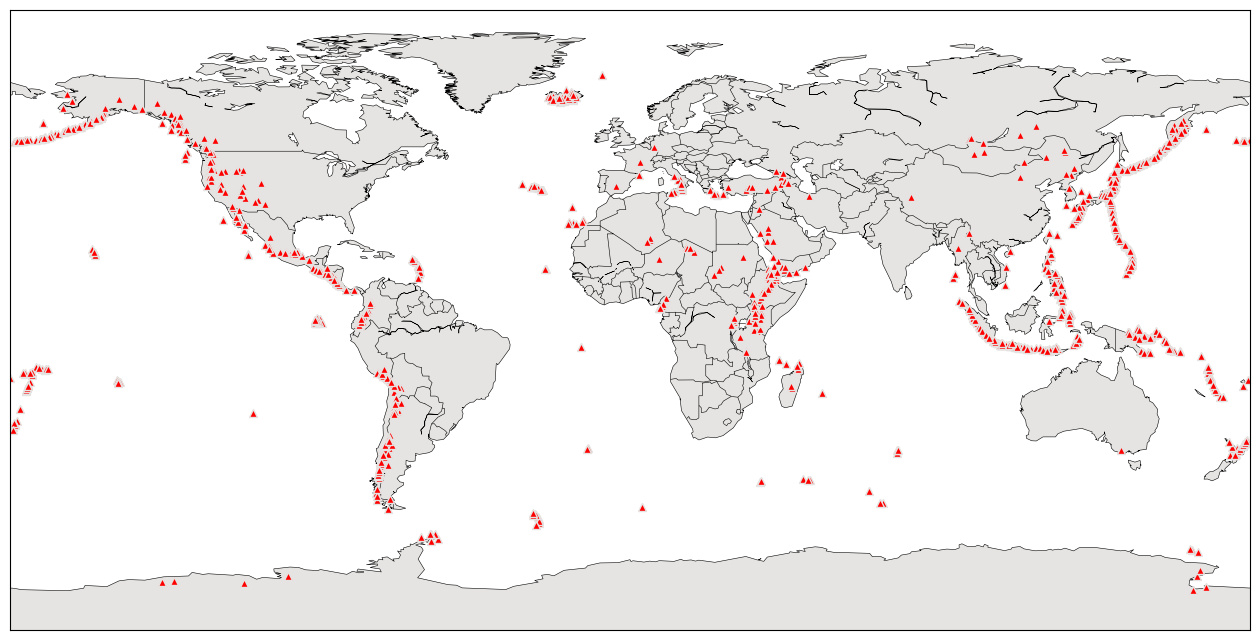

In [42]:
# Basic map to show general location of Volcanoes
  # For high resolution map, install 'basemap-data-hires' --> " resolution='f' "
  # Optional Basemap backgrounds --> 'm.bluemarble()' or 'm.shadedrelief()'

plt.figure(figsize=(16, 11.2))

m=Basemap(projection='cyl', lon_0=0)
m.drawcoastlines(color='black', linewidth=0.4)
m.drawcountries(color='black', linewidth=0.4)

x, y = m(np.array(df_complete['Longitude']), np.array(df_complete['Latitude']))
m.plot(x, y, '^', markersize=5.5, markerfacecolor='red', markeredgecolor='#E5E4E2', markeredgewidth=1)

m.fillcontinents(color='#E5E4E2', lake_color='white')

plt.show()

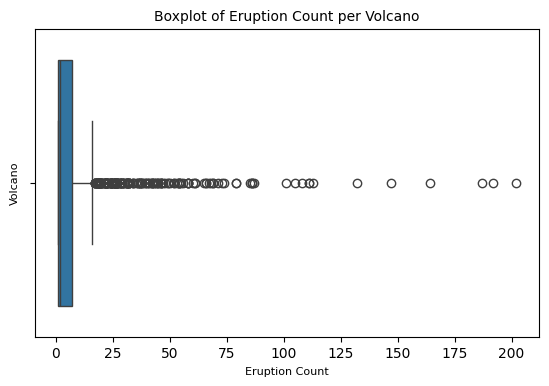

In [41]:
# Boxplot to show data distribution

plt.figure(figsize=(6.5, 4))

sns.boxplot(x = df_complete['Eruption Count'])

plt.xlabel('Eruption Count', fontsize=8)
plt.ylabel('Volcano', fontsize=8)
plt.title('Boxplot of Eruption Count per Volcano', fontsize=10)

plt.show()

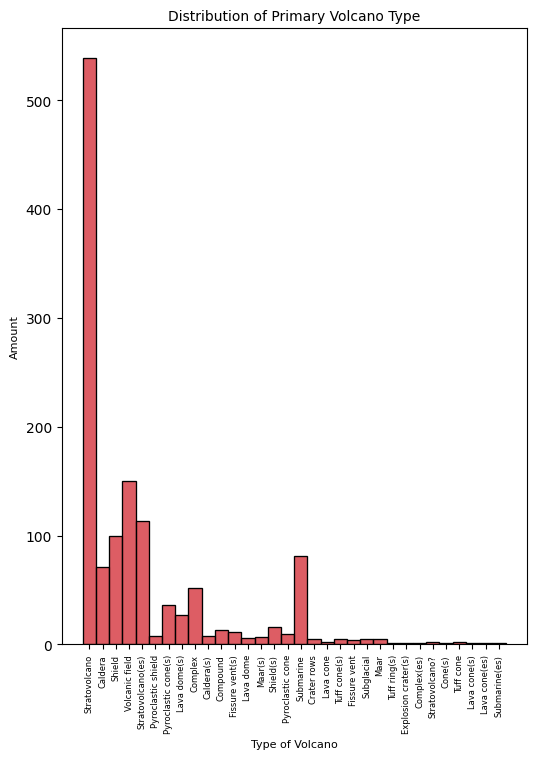

In [43]:
# Historgram to show the distribution of primary volcano types

plt.figure(figsize=(6, 8))

sns.histplot(df_complete['Primary Volcano Type'], bins=8, color='#D22730')

plt.xlabel('Type of Volcano', ha='center', fontsize=8)
plt.ylabel('Amount', fontsize=8)
plt.title('Distribution of Primary Volcano Type', fontsize=10)
plt.xticks(rotation=90, ha='center', fontsize=6)
plt.show()

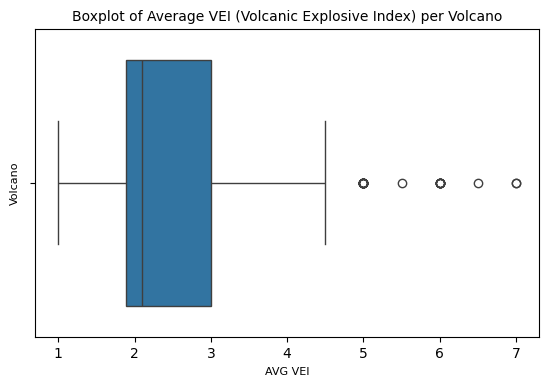

In [39]:
plt.figure(figsize=(6.5, 4))

sns.boxplot(x = df_complete['AVG VEI'])

plt.xlabel('AVG VEI', fontsize=8)
plt.ylabel('Volcano', fontsize=8)
plt.title('Boxplot of Average VEI (Volcanic Explosive Index) per Volcano', fontsize=10)

plt.show()

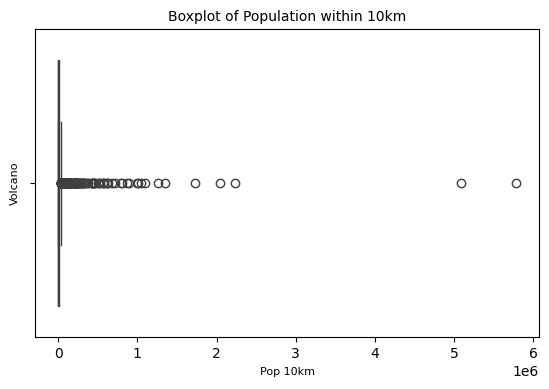

In [37]:
plt.figure(figsize=(6.5, 4))

sns.boxplot(x = df_complete['Pop 10km'])

plt.xlabel('Pop 10km', fontsize=8)
plt.ylabel('Volcano', fontsize=8)
plt.title('Boxplot of Population within 10km', fontsize=10)

plt.show()

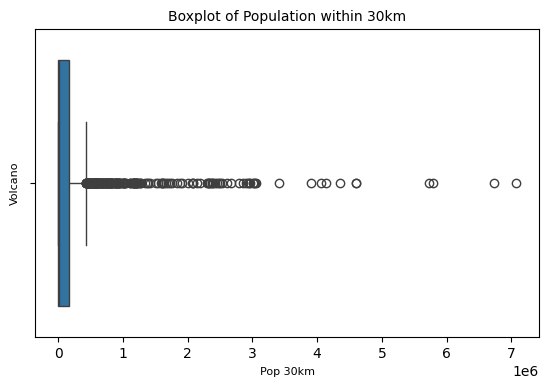

In [38]:
plt.figure(figsize=(6.5, 4))

sns.boxplot(x = df_complete['Pop 30km'])

plt.xlabel('Pop 30km', fontsize=8)
plt.ylabel('Volcano', fontsize=8)
plt.title('Boxplot of Population within 30km', fontsize=10)

plt.show()

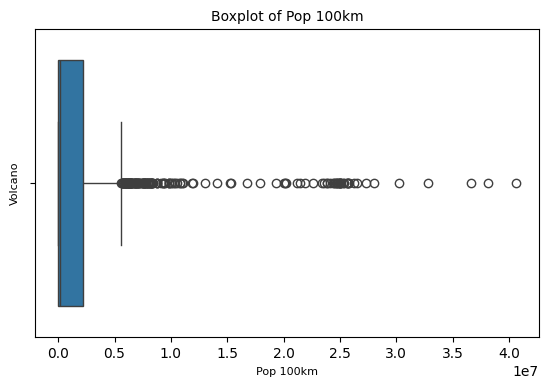

In [34]:
plt.figure(figsize=(6.5, 4))

sns.boxplot(x = df_complete['Pop 100 km'])

plt.xlabel('Pop 100km', fontsize=8)
plt.ylabel('Volcano', fontsize=8)
plt.title('Boxplot of Pop 100km', fontsize=10)

plt.show()

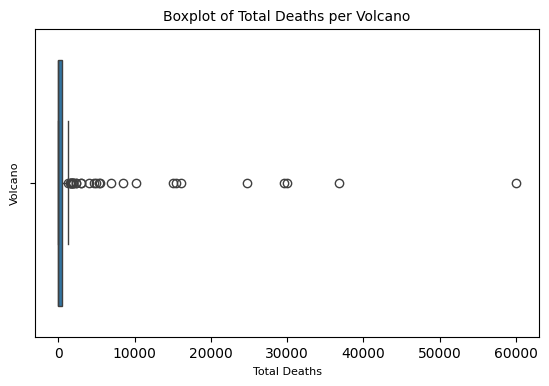

In [40]:
plt.figure(figsize=(6.5, 4))

sns.boxplot(x = df_complete['Total Deaths'])

plt.xlabel('Total Deaths', fontsize=8)
plt.ylabel('Volcano', fontsize=8)
plt.title('Boxplot of Total Deaths per Volcano', fontsize=10)

plt.show()

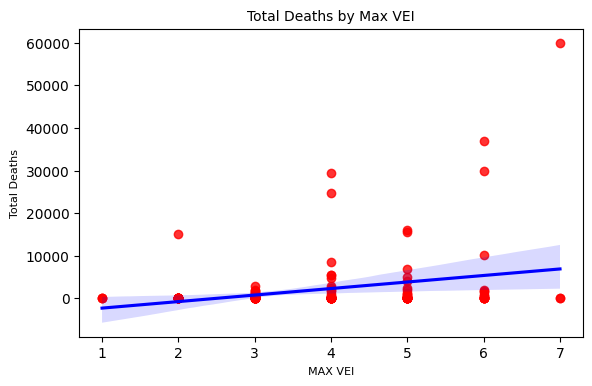

In [35]:
# seaborn scatter plot with regression line
plt.figure(figsize=(6.5, 4))

sns.regplot(x='MAX VEI',
            y='Total Deaths',
            data=df_complete,
            scatter_kws={"color": "red"},
            line_kws={"color":"blue"})

plt.xlabel('MAX VEI', fontsize=8)
plt.ylabel('Total Deaths', fontsize=8)
plt.title('Total Deaths by Max VEI', fontsize=10)
plt.show()

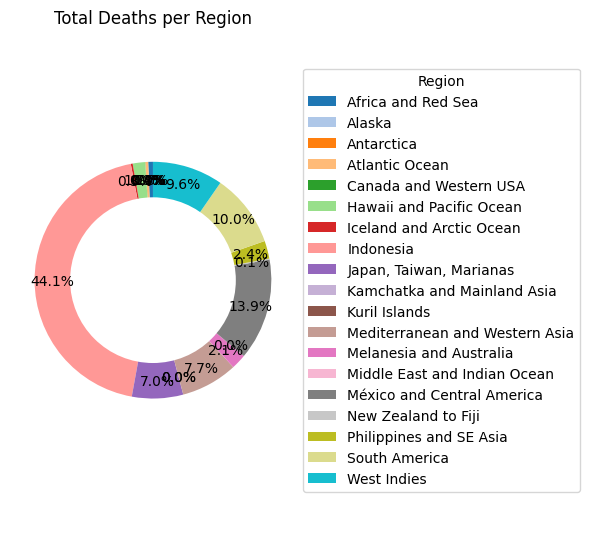

In [56]:
# Donut Chart to show Total Deaths per region

grouped = df_complete.groupby('Region')['Total Deaths'].sum().reset_index()
fig, ax = plt.subplots(figsize=(6, 5.5))

  # Create a pie chart and set the center to create a doughnut chart
wedges, texts, autotexts = ax.pie(
    grouped['Total Deaths'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=plt.cm.tab20.colors
)
  # Draw a circle at the center of the pie to make it a doughnut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

  # Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

ax.legend(wedges, grouped['Region'], title="Region", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Total Deaths per Region')
plt.title('Total Deaths per Region', loc='center')
plt.tight_layout()
plt.show()

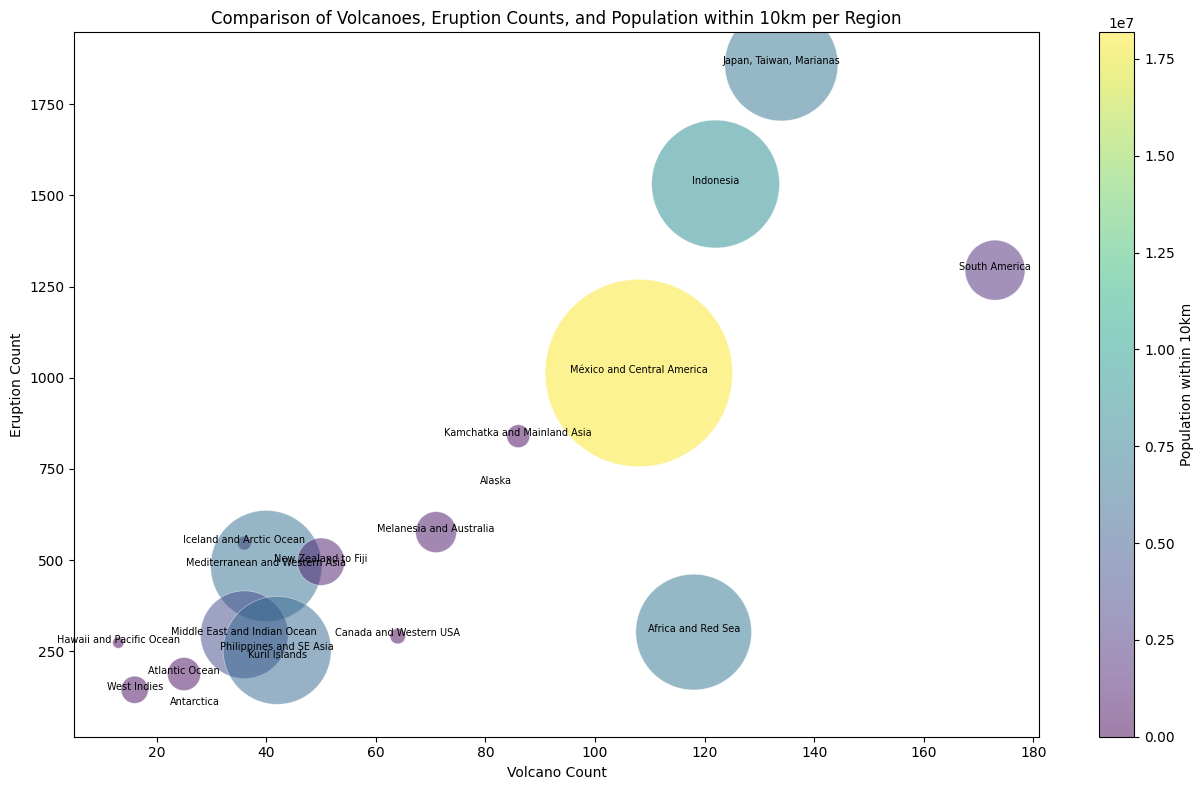

In [50]:
# Bubble Chart to compare data per Region

  # Group and aggregate the data
grouped = df_complete.groupby('Region').agg({
    'Volcano Name': 'count',
    'Eruption Count': 'sum',
    'Pop 10km': 'sum'
}).reset_index()

  # Rename columns for clarity
grouped.columns = ['Region', 'Volcano Count', 'Eruption Count', 'Population within 10km']

fig, ax = plt.subplots(figsize=(13, 8))

  # Scatter plot with bubble size
scatter = ax.scatter(
    grouped['Volcano Count'],
    grouped['Eruption Count'],
    s=grouped['Population within 10km'] / 1000,
    alpha=0.5,
    c=grouped['Population within 10km'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

ax.set_xlabel('Volcano Count')
ax.set_ylabel('Eruption Count')
ax.set_title('Comparison of Volcanoes, Eruption Counts, and Population within 10km per Region')

  # Adding text labels for each bubble
for i in range(len(grouped)):
    ax.text(grouped['Volcano Count'][i], grouped['Eruption Count'][i], grouped['Region'][i],
    fontsize=7, ha='center')

cbar = plt.colorbar(scatter)
cbar.set_label('Population within 10km')

plt.tight_layout()
plt.show()

In [ ]:
df_integer = pd.read_csv("kestrel_hawkeye.csv")

In [ ]:
# To numerize all columns for correlation matrix (changing categorical values as numerical values)

df_number = df_integer

for col_name in df_number.columns:
  if(df_number[col_name].dtype == 'object'):
    df_number[col_name] = df_number[col_name].astype('category')
    df_number[col_name] = df_number[col_name].cat.codes

df_number

In [ ]:
# Checking for correlations
# default correlation method is 'pearson'
# 'pearson', 'kendall', 'spearman'

df_integer.corr(method='spearman')

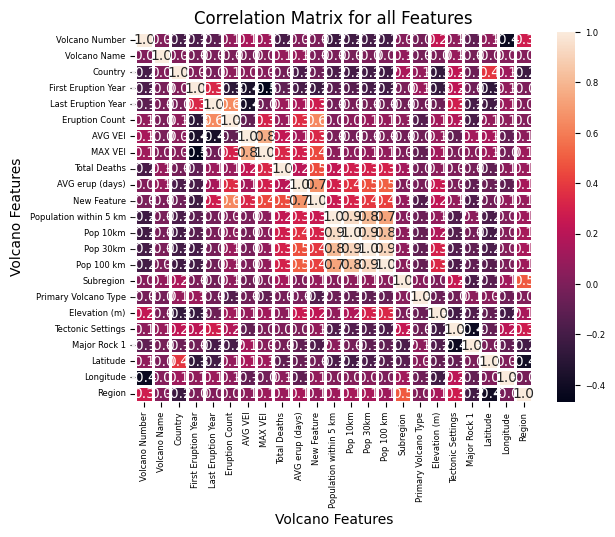

In [ ]:
# Correlation Matrix Vizualization

corr_matrix = df_integer.corr(method='spearman')

sns.heatmap(corr_matrix, annot=True,  fmt='.1f', annot_kws={'fontsize': 10}, linewidths= 1, square= False)

plt.title('Correlation Matrix for all Features')

plt.xlabel('Volcano Features')

plt.ylabel('Volcano Features')

plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6

plt.show()

**Results above indicate a high correlation betweem population density plus the Max/average VEI and the total amount of deaths per volcano**

---



In [ ]:
correlation_volc = df_integer.corr()

corr_pairs = correlation_volc.unstack()

corr_pairs

Volcano Number  Volcano Number         1.000000
                Volcano Name           0.012137
                Country               -0.235341
                First Eruption Year   -0.147037
                Last Eruption Year    -0.023868
                                         ...   
Region          Tectonic Settings      0.267434
                Major Rock 1          -0.206912
                Latitude              -0.383963
                Longitude             -0.046153
                Region                 1.000000
Length: 529, dtype: float64

In [ ]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Volcano Number      Longitude             -0.482149
Longitude           Volcano Number        -0.482149
Last Eruption Year  AVG VEI               -0.417739
AVG VEI             Last Eruption Year    -0.417739
MAX VEI             First Eruption Year   -0.396128
                                             ...   
Elevation (m)       Elevation (m)          1.000000
Tectonic Settings   Tectonic Settings      1.000000
Major Rock 1        Major Rock 1           1.000000
New Feature         New Feature            1.000000
Region              Region                 1.000000
Length: 529, dtype: float64

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.3],[(sorted_pairs) < 0.6]

high_corr

(MAX VEI                 New Feature               0.331633
 New Feature             MAX VEI                   0.331633
                         Pop 30km                  0.369069
 Pop 30km                New Feature               0.369069
 Pop 100 km              New Feature               0.378168
 New Feature             Pop 100 km                0.378168
 First Eruption Year     Last Eruption Year        0.379153
 Last Eruption Year      First Eruption Year       0.379153
 Country                 Latitude                  0.412486
 Latitude                Country                   0.412486
 Population within 5 km  Pop 30km                  0.495667
 Pop 30km                Population within 5 km    0.495667
 Subregion               Region                    0.515925
 Region                  Subregion                 0.515925
 Pop 10km                Pop 30km                  0.583924
 Pop 30km                Pop 10km                  0.583924
 MAX VEI                 AVG VEI        

<ipython-input-22-809d248a6e35>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


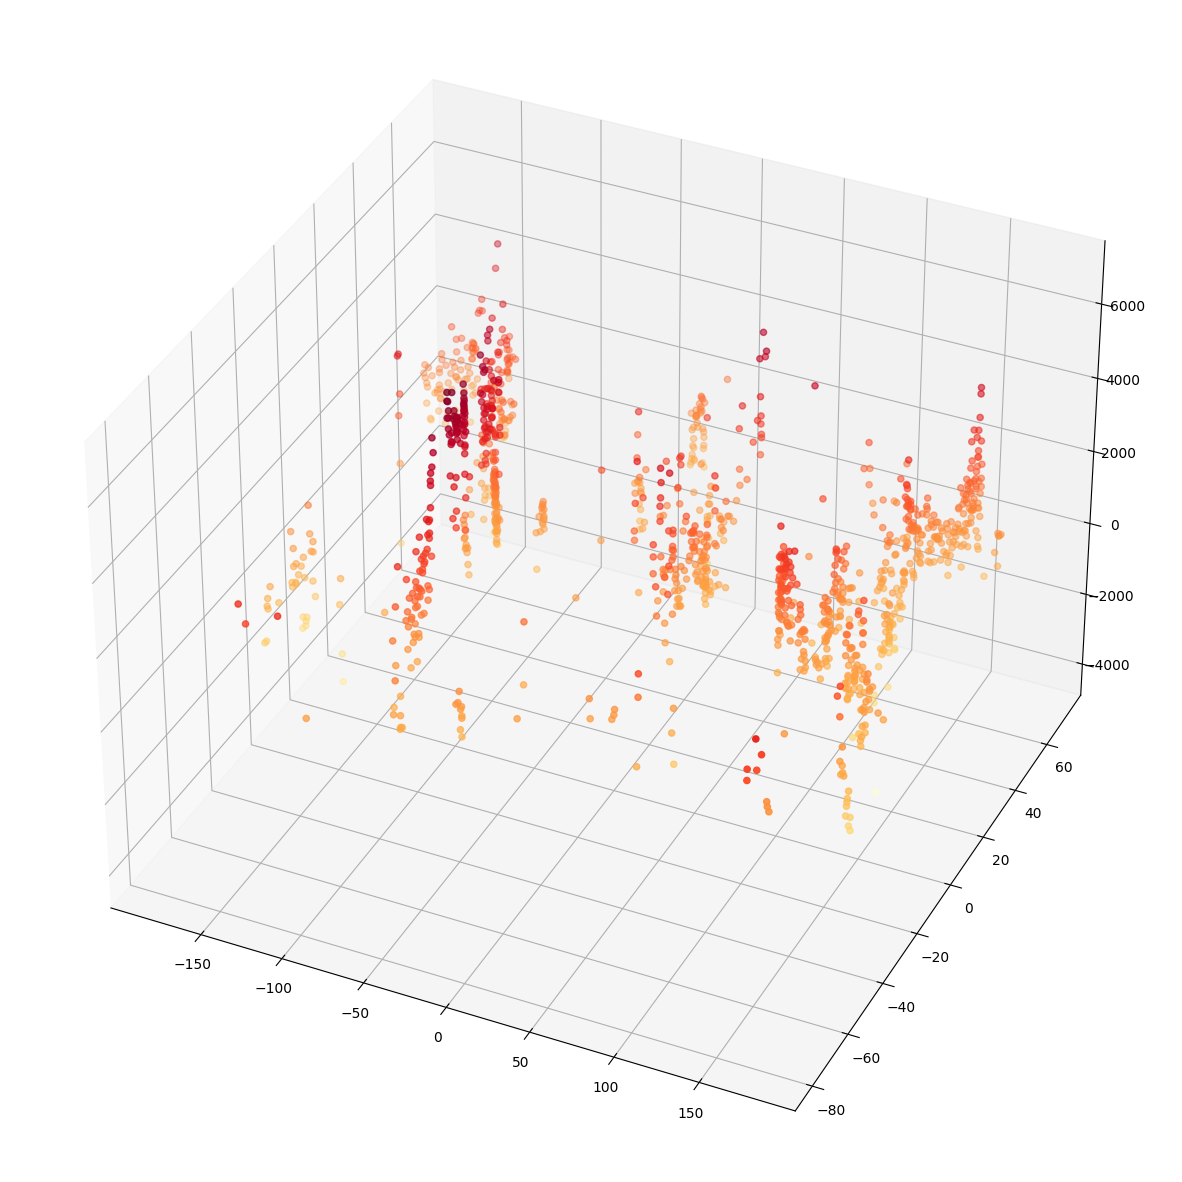

In [22]:
# 3D Scatter and Heatmap of Volcanoes ###

fig = plt.figure(figsize=(15,25))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(20, 10))
# Define the x, y, and z coordinates of the volcanoes
x = df_complete['Longitude']
y = df_complete['Latitude']
z = df_complete['Elevation (m)']

### colormap
cmap = plt.cm.get_cmap('YlOrRd')

### 3D heatmap
ax.scatter(x, y, z, c=z, cmap=cmap, depthshade=True)

### title and labels
#ax.set_title('3D Heatmap of Volcano Elevations')
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')
#ax.set_zlabel('Elevation (m)')

ax.view_init(elev=35, azim=-65)

# Show the plot
plt.show()